## SCIMAP
This notebook is for testing purposes based on the official SCIMAP instructions. Please refer to the original data here: scimap-doc.readthedocs.io. <br>

Some of the analysis done here might not be identical as shown on the tutorials. This is solely is program testing.

Before you start make sure you have installed the following packages: <br>
#pip install scimap <br>
#pip install scanpy <br>
#pip install leidenalg <br>
#pip install PyQt5 <br>

In [2]:
# Import and load libraries
import sys
import os
import anndata as ad
import pandas as pd
import scanpy as sc
import seaborn as sns; sns.set(color_codes=True)

# Import Scimap
import scimap as sm

/Users/virly/opt/anaconda3/envs/scimap/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



In [3]:
# Set working directory
os.chdir("/Users/virly/beta_script/spatial-omics/")

#### Step 1: Load Data and Convert to AnnData

In [4]:
# Import Data (Data) and Meta Data
counts_data = pd.read_csv('./files/counts_table.csv') # This contains counts matrix
meta_data = pd.read_csv('./files/meta_data.csv') # This contains meta data such as coordinates

In [5]:
# Convert to AnnData
adata = ad.AnnData(counts_data)
adata.obs = meta_data # Concatenate meta data into adata

/Users/virly/opt/anaconda3/envs/scimap/lib/python3.8/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning:

Transforming to str index.



In [6]:
# Evaluate content
adata

AnnData object with n_obs × n_vars = 4825 × 48
    obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation'

In [7]:
type(adata)

anndata._core.anndata.AnnData

In [8]:
# Evaluate meta data: This should provide us a dataframe consisting of ROIs parameters.
adata.obs

,X_centroid,Y_centroid,Area,MajorAxisLength,MinorAxisLength,Eccentricity,Solidity,Extent,Orientation
0,511.555556,9.846154,117,14.532270,10.273628,0.707261,0.959016,0.750000,-0.695369
1,579.330097,9.398058,103,16.056286,8.776323,0.837396,0.903509,0.613095,1.115707
2,630.958333,12.883333,120,15.222005,10.310756,0.735653,0.975610,0.681818,0.151616
3,745.194631,16.275168,149,14.380200,13.404759,0.362027,0.967532,0.662222,-0.270451
4,657.173653,18.035928,167,17.675831,12.110106,0.728428,0.943503,0.695833,-0.810890
...,...,...,...,...,...,...,...,...,...
4820,559.597403,1091.577922,154,18.150307,11.683288,0.765281,0.900585,0.570370,-0.342315
4821,619.983871,1092.959677,248,21.734414,15.565820,0.697912,0.864111,0.551111,1.432242
4822,583.317073,1093.573171,82,12.060039,9.539789,0.611784,0.964706,0.630769,0.203023
4823,607.064394,1101.583333,264,22.549494,15.905321,0.708858,0.882943,0.661654,0.691838


In [9]:
# Evaluate the first 5 channels (markers)
adata.var[0:5]

""
DNA1
BG1
BG2
BG3
DNA2


#### Step 2: Quality Control
Based on the result shown above, we notice that "BG" representing background channels are present. This might cause confusion on the final analysis, we can omit them by adjusting the output dataset from MCMICRO.

In [10]:
# Provide path to MCMICRO output
mcmicro_path = ['./files/mcmicro_output.csv']

# Omit "BG" channels from based on adata
adata = sm.pp.mcmicro_to_scimap(mcmicro_path, drop_markers = ["PERK", "NOS2", "BG1", "BG2", "BG3", "ACTIN"])

Loading mcmicro_output.csv


In [11]:
# Evaluate our adata after omitting several channels
adata

AnnData object with n_obs × n_vars = 4825 × 30
    obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'CellID', 'imageid'
    uns: 'all_markers'

In [12]:
# Log normalized data
adata.X

array([[6.3674684, 6.4287267, 7.3826084, ..., 6.990933 , 5.3915663,
        8.061951 ],
       [6.340171 , 6.094227 , 7.339796 , ..., 6.981601 , 5.1088834,
        8.044872 ],
       [6.503502 , 6.3549495, 7.4734573, ..., 7.0608125, 5.4325933,
        8.057412 ],
       ...,
       [6.5583014, 6.660794 , 7.4199724, ..., 7.1181645, 7.1265283,
        8.069404 ],
       [6.3370404, 6.281594 , 7.2397914, ..., 6.939489 , 5.7504296,
        8.01955  ],
       [6.3805585, 6.180567 , 7.2547846, ..., 6.909312 , 5.659422 ,
        8.035377 ]], dtype=float32)

In [13]:
# Raw data
adata.raw.X

array([[ 581.5812 ,  618.38464, 1606.7778 , ..., 1085.735  ,  218.54701,
        3170.47   ],
       [ 565.8932 ,  442.29126, 1539.3981 , ..., 1075.6407 ,  164.48544,
        3116.767  ],
       [ 666.475  ,  574.3333 , 1759.6833 , ..., 1164.3917 ,  227.74167,
        3156.1084 ],
       ...,
       [ 704.0732 ,  780.1707 , 1667.9878 , ..., 1233.183  , 1243.5488 ,
        3194.195  ],
       [ 564.1212 ,  533.64014, 1392.803  , ..., 1031.2424 ,  313.32574,
        3038.8105 ],
       [ 589.2572 ,  482.2659 , 1413.8584 , ..., 1000.5578 ,  285.98267,
        3087.3005 ]], dtype=float32)

In [14]:
# Evaluate meta data
adata.obs

,X_centroid,Y_centroid,Area,MajorAxisLength,MinorAxisLength,Eccentricity,Solidity,Extent,Orientation,CellID,imageid
mcmicro_output_1,511.555556,9.846154,117,14.532270,10.273628,0.707261,0.959016,0.750000,-0.695369,1,mcmicro_output
mcmicro_output_2,579.330097,9.398058,103,16.056286,8.776323,0.837396,0.903509,0.613095,1.115707,2,mcmicro_output
mcmicro_output_3,630.958333,12.883333,120,15.222005,10.310756,0.735653,0.975610,0.681818,0.151616,3,mcmicro_output
mcmicro_output_4,745.194631,16.275168,149,14.380200,13.404759,0.362027,0.967532,0.662222,-0.270451,4,mcmicro_output
mcmicro_output_5,657.173653,18.035928,167,17.675831,12.110106,0.728428,0.943503,0.695833,-0.810890,5,mcmicro_output
...,...,...,...,...,...,...,...,...,...,...,...
mcmicro_output_4821,559.597403,1091.577922,154,18.150307,11.683288,0.765281,0.900585,0.570370,-0.342315,4821,mcmicro_output
mcmicro_output_4822,619.983871,1092.959677,248,21.734414,15.565820,0.697912,0.864111,0.551111,1.432242,4822,mcmicro_output
mcmicro_output_4823,583.317073,1093.573171,82,12.060039,9.539789,0.611784,0.964706,0.630769,0.203023,4823,mcmicro_output
mcmicro_output_4824,607.064394,1101.583333,264,22.549494,15.905321,0.708858,0.882943,0.661654,0.691838,4824,mcmicro_output


#### Step 3: Use Scanpy package to explore the data

/Users/virly/opt/anaconda3/envs/scimap/lib/python3.8/site-packages/seaborn/categorical.py:82: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



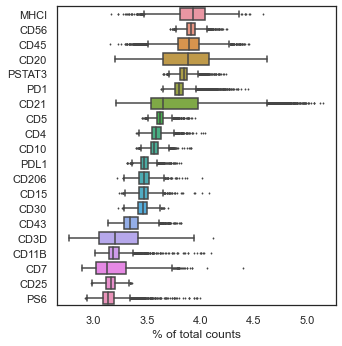

In [15]:
# Visualize the most expressing proteins
sc.pl.highest_expr_genes(adata, n_top=20, )

Based on the box plot shown above, we see many outliers on most of the biomarkers. Below we perform PCA to obtain a cluster plot.

/Users/virly/opt/anaconda3/envs/scimap/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning:

The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.

... storing 'imageid' as categorical


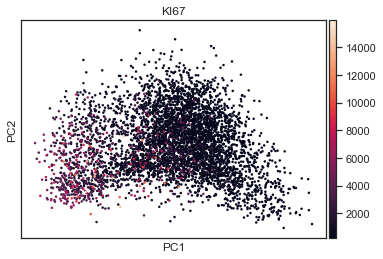

In [17]:
# Perform PCA
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca(adata, color='KI67')

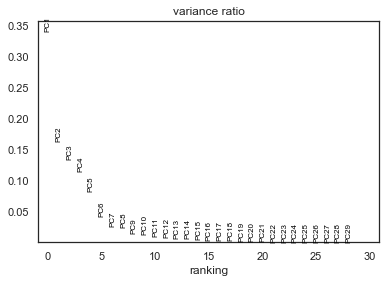

In [18]:
# PCs to the total variance in the data
sc.pl.pca_variance_ratio(adata)

In [19]:
# Save the result
adata.write('tutorial_data.h5ad')

### Cell-Phenotyping using Scimap

In [20]:
# Load necessary libraries
import sys
import os
import anndata as ad
import pandas as pd
import scanpy as sc
import seaborn as sns; sns.set(color_codes=True)

# Import scimap
import scimap as sm

In [21]:
# We are using the data that has been processed previously.

#### Step 4: Load Data

In [22]:
adataV2 = ad.read('tutorial_data.h5ad')

#### Step 5: Clustering and Data Exploration

In [23]:
# Compute neighborhood graph
# n_neighbors refer to size of local neighborhood (through neighborhood data points used for manifold approximation)
sc.pp.neighbors(adataV2, n_neighbors=30, n_pcs=10)

In [24]:
# Create a UMAP to visualize the neighborhood graph
sc.tl.umap(adataV2)

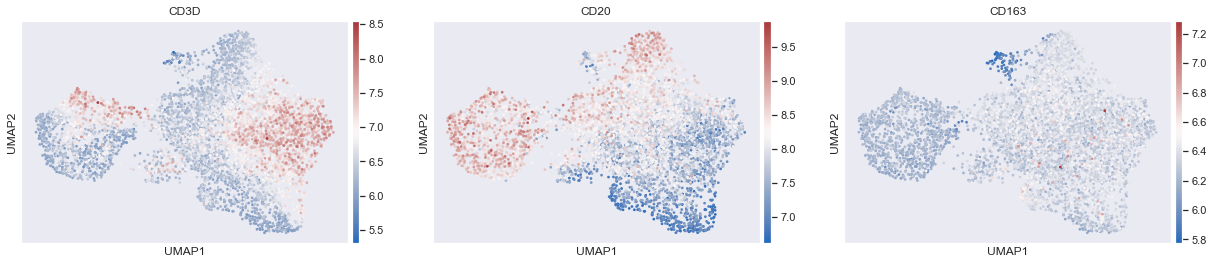

In [25]:
# Visualize and Plot the UMAP
sc.pl.umap(adataV2, color=['CD3D', 'CD20', 'CD163'], cmap='vlag', use_raw=False, s=30)

The result shown above can tell us whether our segmentation step was good or not. Otherwise, we would see some overlaps as the one shown with CD3D and CD20.

In [26]:
# Cluster the neighborhood graph: Using Leiden clustering
sc.tl.leiden(adataV2, resolution=1)

/Users/virly/opt/anaconda3/envs/scimap/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



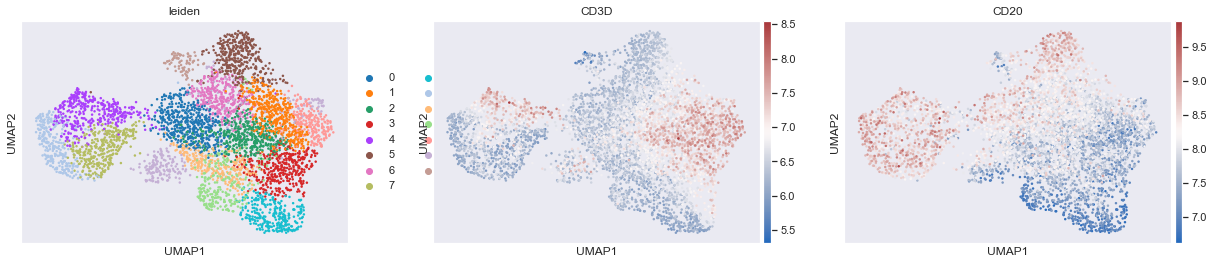

In [28]:
# Visualize and plot the cluster
sc.pl.umap(adataV2, color=['leiden', 'CD3D', 'CD20'], cmap='vlag',use_raw=False)

Under the leiden cluster plot, we see there are 14 clusters mapped on the sample. The colors are based on the gene biomarkers that are distributed. To further inspect which marker genes are most expressed on each cluster, we plot each cluster while summarizing the the top 10 genes which are mostly expressed below.

### Finding Marker Genes

/Users/virly/opt/anaconda3/envs/scimap/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning:

overflow encountered in expm1

/Users/virly/opt/anaconda3/envs/scimap/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning:

overflow encountered in expm1

/Users/virly/opt/anaconda3/envs/scimap/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning:

invalid value encountered in true_divide

/Users/virly/opt/anaconda3/envs/scimap/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning:

divide by zero encountered in log2

/Users/virly/opt/anaconda3/envs/scimap/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning:

overflow encountered in expm1

/Users/virly/opt/anaconda3/envs/scimap/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning:

overflow encountered in expm1

/Users/virly/opt/anaconda3/envs/scimap/lib/python3.8/s

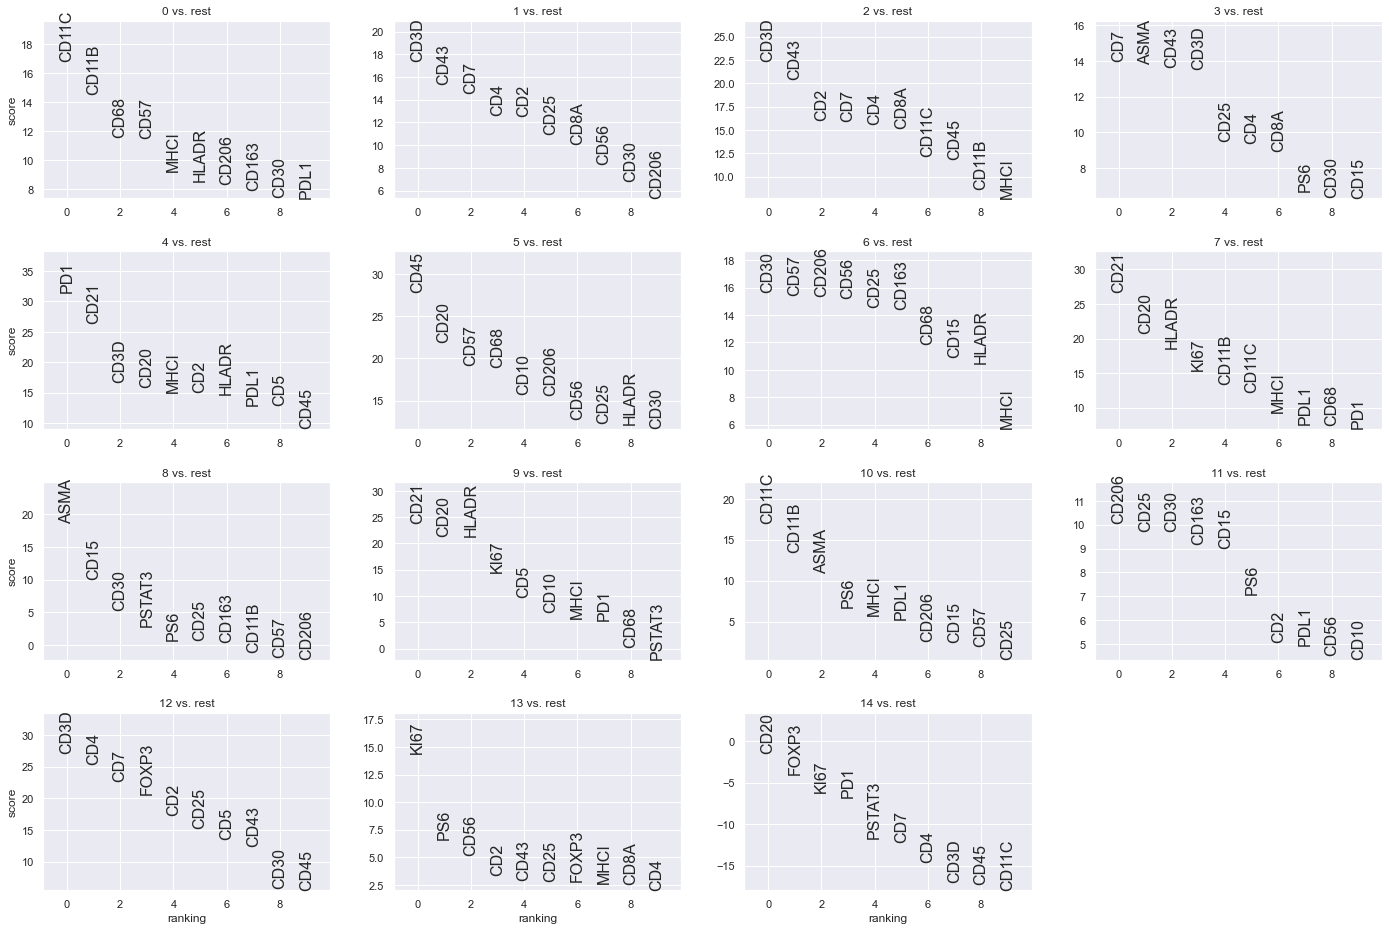

In [29]:
sc.tl.rank_genes_groups(adataV2, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adataV2, n_genes=10, sharey=False, fontsize=16)

### Probability Distribution based on Phenotyping

In [30]:
# This approach is more sensitive but labor intensive.

#### Step 1: Identify the gates using sm.pl.gate_finder

In [31]:
%gui qt

In [32]:
# Identify the gates
image_path = './files/reactive_core.tif'
marker_of_interest = 'CD45'

In [33]:
# Initialize gate finder
sm.pl.gate_finder(image_path, adataV2, marker_of_interest,
                  from_gate = 5, to_gate = 9, increment = 0.1,
                  markers=['ASMA','DNA11','CD20','CD3D'], point_size=6)

In [34]:
# Load the manual gates and rescale the data based on the gate
manual_gate = pd.read_csv('./files/manual_gates.csv')
adataV2 = sm.pp.rescale(adataV2, gate=manual_gate)

GMM for ['mcmicro_output']
Categories (1, object): ['mcmicro_output']
Finding the optimal gate by GMM for CD2
Finding the optimal gate by GMM for CD10
Finding the optimal gate by GMM for CD5
Finding the optimal gate by GMM for CD30
Finding the optimal gate by GMM for KI67
Finding the optimal gate by GMM for CD7
Finding the optimal gate by GMM for PSTAT3
Finding the optimal gate by GMM for PS6
Finding the optimal gate by GMM for CD43
Finding the optimal gate by GMM for PDL1
Finding the optimal gate by GMM for CD57
Finding the optimal gate by GMM for MHCI
Scaling Image mcmicro_output
Scaling CD25
Scaling CD2
Scaling CD10
Scaling CD163
Scaling CD3D
Scaling CD5
Scaling CD30
Scaling CD45
Scaling CD206
Scaling CD68
Scaling PD1
Scaling KI67
Scaling CD11C
Scaling CD7
Scaling CD8A
Scaling FOXP3
Scaling CD20
Scaling CD4
Scaling HLADR
Scaling PSTAT3
Scaling PS6
Scaling CD21
Scaling CD43
Scaling PDL1
Scaling CD11B
Scaling CD57
Scaling MHCI
Scaling CD15
Scaling ASMA
Scaling CD56


In [35]:
# View the scaled data
adataV2.X

array([[0.20328999, 0.4808662 , 0.5012908 , ..., 0.14444375, 0.23996025,
        0.09299326],
       [0.18965101, 0.3512311 , 0.45058727, ..., 0.14079428, 0.17913204,
        0.08081818],
       [0.2712574 , 0.45227408, 0.55103636, ..., 0.17177176, 0.24878854,
        0.08975792],
       ...,
       [0.2986374 , 0.58847904, 0.52175   , ..., 0.19420052, 0.571575  ,
        0.09830666],
       [0.18808699, 0.42384505, 0.32844162, ..., 0.12432528, 0.31718117,
        0.06276608],
       [0.20983028, 0.3846922 , 0.34675407, ..., 0.11252379, 0.29759794,
        0.07404852]], dtype=float32)

#### Step 2: Run the phenotyping algorithm on the rescaled data using sm.tl.phenotype

In [36]:
# Laod the gating workflow
phenotype = pd.read_csv('./files/phenotype_workflow.csv')
adataV2 = sm.tl.phenotype_cells(adataV2, phenotype=phenotype, label="phenotype")

Phenotyping Other Immune cells
Phenotyping ASMA+ cells
-- Subsetting Other Immune cells
Phenotyping T cells
Phenotyping B cells
Phenotyping Myeloid Lineage
Phenotyping NK cells
Phenotyping Granulocytes
-- Subsetting Myeloid Lineage
Phenotyping T cells
Phenotyping B cells
Phenotyping NK cells
Phenotyping Granulocytes
Phenotyping CD68+ Macrophages
Phenotyping M2 Macrophages
Phenotyping Myeloid Dendritic cells
Phenotyping Follicular Dendritic cells
-- Subsetting T cells
Phenotyping CD4 T cells
Phenotyping CD8 T cells
-- Subsetting CD4 T cells
Phenotyping Regulatory T cells
Phenotyping Follicular Helper T cells
-- Subsetting CD8 T cells
Phenotyping PD1+ T cells
-- Subsetting CD68+ Macrophages
Phenotyping M1 Macrophages
-- Subsetting Myeloid Dendritic cells
Phenotyping CD25+ Dendritic cells
Consolidating the phenotypes across all groups


In [37]:
# Summary of the phenotyping
adataV2.obs['phenotype'].value_counts()

B cells                       2138
CD4 T cells                    503
Regulatory T cells             402
ASMA+ cells                    373
CD8 T cells                    365
Follicular Helper T cells      285
Other Immune cells             146
T cells                        141
Unknown                        140
Myeloid Lineage                 89
Follicular Dendritic cells      74
PD1+ T cells                    71
Myeloid Dendritic cells         54
M2 Macrophages                  41
Granulocytes                     2
CD68+ Macrophages                1
Name: phenotype, dtype: int64

### Overlay phenotypes on the image

In [38]:
# View phenotypes
sm.pl.image_viewer(image_path, adataV2, overlay = 'phenotype', point_color='white', point_size=6)

In [40]:
# View Leiden clustering
sm.pl.image_viewer(image_path, adataV2, overlay = 'leiden', point_color='white', point_size=6)

### Heatmap and UMAP of the probability based phenotyping

In [ ]:
# Before proceeding to matrixplot, we implemented dendrogram:
sc.tl.dendrogram(adataV2, groupby='phenotype')

... storing 'phenotype' as categorical


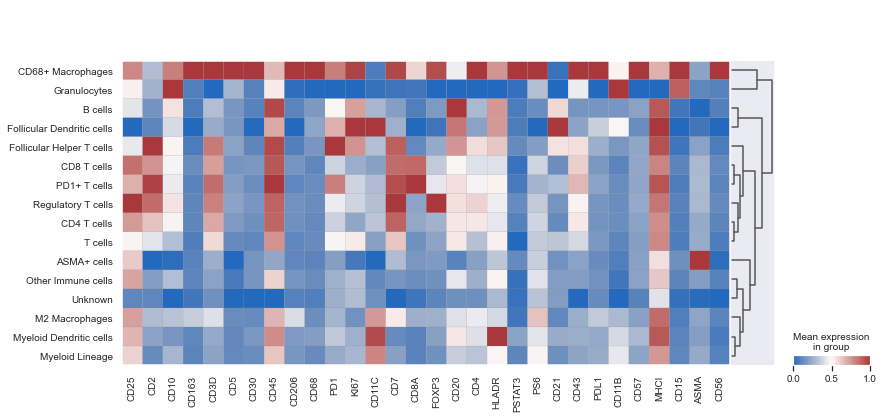

In [42]:
# Visualize and plot heatmap
sc.pl.matrixplot(adataV2, var_names=adataV2.var.index, groupby='phenotype', dendrogram=True, use_raw=False, cmap="vlag", standard_scale='var')

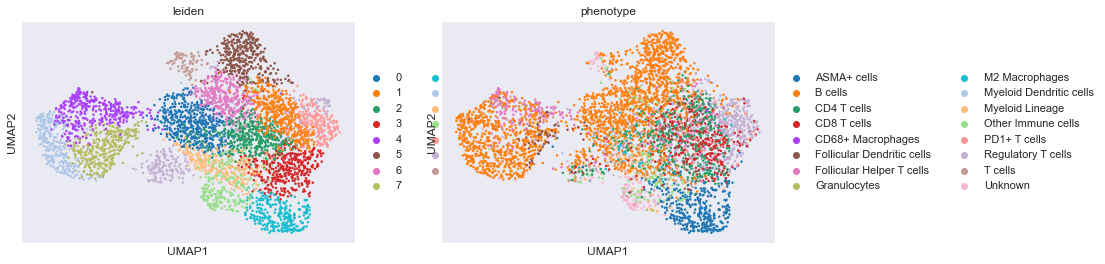

In [44]:
# View clustering
sc.pl.umap(adataV2, color=['leiden','phenotype'])

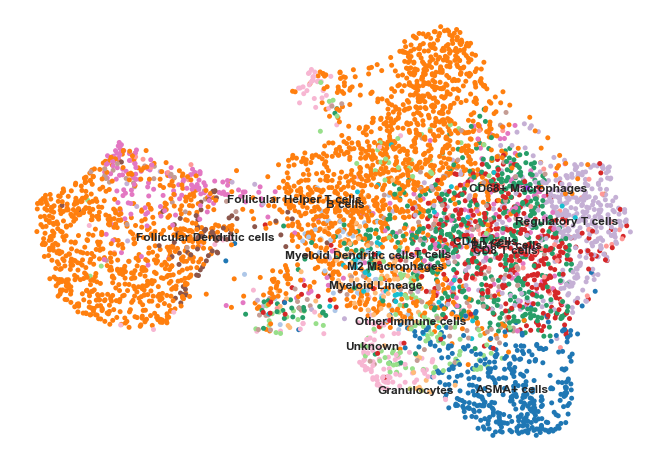

In [45]:
# To better visualize what cells we're looking at, we can implement this:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sc.pl.umap(adataV2, color=['phenotype'],legend_loc='on data', title='', frameon=False, s = 100)

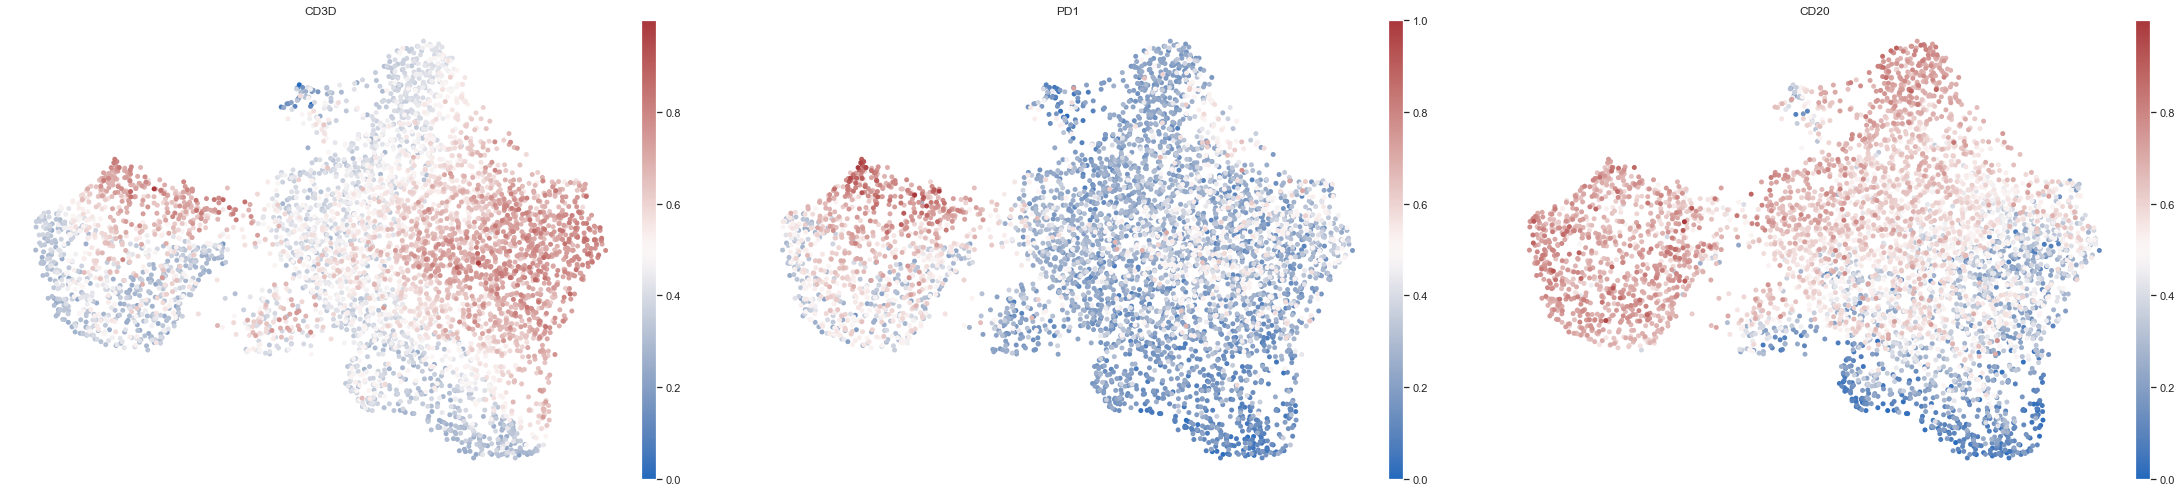

In [46]:
# Visualize using UMAP
sc.pl.umap(adataV2, color=['CD3D', 'PD1', 'CD20'],cmap='vlag', use_raw=False, frameon=False, s = 100)

Based on the plots shown above, it is difficult to find Follicular helper T cells by a pure clustering approach. Below we implement probability based algorithm for deep phenotyping.

In [48]:
# Confirm Follicular T cells in the image
sm.pl.image_viewer(image_path, adataV2,
                   overlay = 'phenotype', overlay_category=['Follicular Helper T cells'],
                   markers = ['CD3D','CD20','PD1','CD8A','CD4','DNA11'],
                   point_color='white', point_size=6)

In [49]:
# Save the results
adataV2.write('tutorial_data.h5ad')

#### Visualize Result

In [51]:
# Load packages
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [52]:
img = np.asarray(Image.open('/Users/virly/Desktop/napari-result.png'))

In [54]:
print(repr(img))

array([[[ 38,  41,  48, 255],
        [ 38,  41,  48, 255],
        [ 38,  41,  48, 255],
        ...,
        [ 38,  41,  48, 255],
        [ 38,  41,  48, 255],
        [ 38,  41,  48, 255]],

       [[ 38,  41,  48, 255],
        [ 38,  41,  48, 255],
        [ 38,  41,  48, 255],
        ...,
        [ 38,  41,  48, 255],
        [ 38,  41,  48, 255],
        [ 38,  41,  48, 255]],

       [[ 38,  41,  48, 255],
        [ 38,  41,  48, 255],
        [ 38,  41,  48, 255],
        ...,
        [ 38,  41,  48, 255],
        [ 38,  41,  48, 255],
        [ 38,  41,  48, 255]],

       ...,

       [[ 38,  41,  48, 255],
        [ 38,  41,  48, 255],
        [ 38,  41,  48, 255],
        ...,
        [ 38,  41,  48, 255],
        [ 38,  41,  48, 255],
        [ 38,  41,  48, 255]],

       [[ 38,  41,  48, 255],
        [ 38,  41,  48, 255],
        [ 38,  41,  48, 255],
        ...,
        [ 38,  41,  48, 255],
        [ 38,  41,  48, 255],
        [ 38,  41,  48, 255]],

       [[ 38

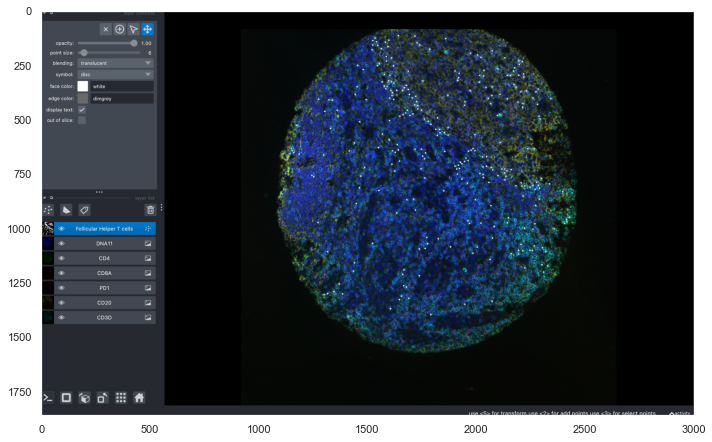

In [57]:
plt.imshow(img)
plt.grid(None)